Rotating shaft analysis by unbalance classification


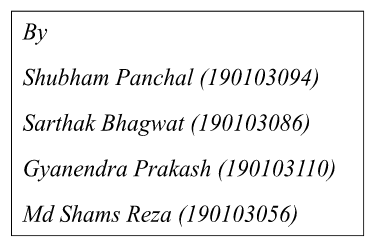

Introduction 

Vibration sensors can be used to detect faults in rotating machinery, which allows for early detection of machine damage and prevents production downtimes by taking timely corrective actions. Machine learning methods can be applied to analyze vibration data, leading to a significant reduction in analysis effort and improved diagnostic accuracy.  To facilitate the development and evaluation of algorithms or unbalance detection, a dataset is used here. The dataset consists of vibrations recorded from a rotating shaft with three sensors at a sampling rate of 4096 values per second, while unbalances of various sizes were attached to the shaft using a 3D-printed holder. The dataset used for the detection of unbalances based on vibration data along with this study is available via the Fraunhofer Fordatis database

Dataset 

This dataset contains vibration data recorded on a rotating drive train. This drive train consists of an electronically commutated DC motor and a shaft driven by it, which passes through a roller bearing. With the help of a 3D-printed holder, unbalances with different weights and different radii were attached to the shaft. Besides the strength of the unbalances, the rotation speed of the motor was also varied.This dataset can be used to develop and test algorithms for the automatic detection of unbalances on drive trains. Datasets for 4 differently sized unbalances and for the unbalance-free case were recorded. The vibration data was recorded at a sampling rate of 4096 values per second.

So this was asked to be done during the presentation, it is a fft on sound recording of a fan from my room. The plot is pretty weird, maybe cause i converted original mpeg format into wav. 

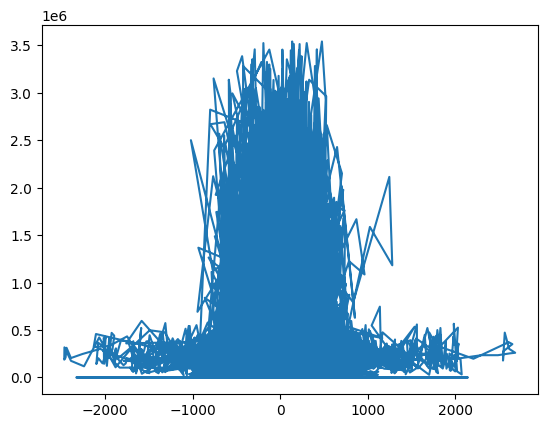

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = wav.read('/content/WhatsApp Audio 2023-05-04 at 19.18.14.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy as sc
import zipfile
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm


url = '../data/fraunhofer_eas_dataset_for_unbalance_detection_v1.zip'
with zipfile.ZipFile(url, 'r') as f:
    with f.open('0D.csv', 'r') as c:
        data0D = pd.read_csv(c)
    with f.open('0E.csv', 'r') as c:
        data0E = pd.read_csv(c)
    with f.open('1D.csv', 'r') as c:
        data1D = pd.read_csv(c)
    with f.open('1E.csv', 'r') as c:
        data1E = pd.read_csv(c)
    with f.open('2D.csv', 'r') as c:
        data2D = pd.read_csv(c)
    with f.open('2E.csv', 'r') as c:
        data2E = pd.read_csv(c)
    with f.open('3D.csv', 'r') as c:
        data3D = pd.read_csv(c)
    with f.open('3E.csv', 'r') as c:
        data3E = pd.read_csv(c)
    with f.open('4D.csv', 'r') as c:
        data4D = pd.read_csv(c)
    with f.open('4E.csv', 'r') as c:
        data4E = pd.read_csv(c)

In [ ]:
skip = 50000      # skipping Since the first about 10 seconds are noisy due to the warm-up phase of the measuring device  
data0D = data0D.iloc[skip:,:]
data1D = data0D.iloc[skip:,:]
data2D = data0D.iloc[skip:,:]
data3D = data0D.iloc[skip:,:]
data4D = data0D.iloc[skip:,:]

data0E = data0E.iloc[skip:,:]
data1E = data0E.iloc[skip:,:]
data2E = data0E.iloc[skip:,:]
data3E = data0E.iloc[skip:,:]
data4E = data4E.iloc[skip:,:]  

In [ ]:
data0E

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
50000,4.0,1026.9841,0.020367,0.033482,0.026215
50001,4.0,1026.9841,0.019192,0.034207,0.026509
50002,4.0,1026.9841,0.016861,0.033402,0.026835
50003,4.0,1026.9841,0.017999,0.033278,0.026187
50004,4.0,1026.9841,0.019349,0.034159,0.025806
...,...,...,...,...,...
6893562,8.1,1959.3277,0.000098,0.000602,0.003182
6893563,8.1,1959.3277,0.000110,0.000299,0.004029
6893564,8.1,1959.3277,0.000626,0.000457,0.003378
6893565,8.1,1959.3277,0.001309,0.000594,0.003142


In [ ]:
data0E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.843567e+06,6.843567e+06,6.843567e+06,6.843567e+06,6.843567e+06
mean,6.061296e+00,1.490888e+03,5.884835e-04,7.014949e-04,3.261529e-03
std,1.205810e+00,2.565084e+02,6.512743e-03,8.192315e-03,2.597875e-03
min,4.000000e+00,1.025974e+03,-8.161068e-02,-1.398516e-01,-2.267003e-02
25%,5.000000e+00,1.273534e+03,-1.417399e-03,-1.353025e-03,2.033710e-03
50%,6.100000e+00,1.486869e+03,5.376339e-04,6.043911e-04,3.211498e-03
75%,7.100000e+00,1.710401e+03,2.691746e-03,2.683401e-03,4.520416e-03
max,8.100000e+00,1.959616e+03,8.706570e-02,1.345038e-01,2.895355e-02


In [ ]:
data4E

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
50000,4.0,1027.8549,0.011660,0.022202,0.018487
50001,4.0,1027.8549,0.023532,-0.014404,0.016562
50002,4.0,1027.8549,-0.000423,0.049901,0.017732
50003,4.0,1027.8549,-0.000499,0.057977,0.019388
50004,4.0,1027.8549,0.024875,0.009763,0.015419
...,...,...,...,...,...
6914042,4.0,1080.4582,0.002939,-0.003955,0.002704
6914043,4.0,1080.4582,-0.000345,0.002913,0.000757
6914044,4.0,1080.4582,-0.003408,0.002537,-0.001725
6914045,4.0,1080.4582,-0.004315,-0.002156,-0.000253


In [ ]:
data4E.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,6.864047e+06,6.864047e+06,6.864047e+06,6.864047e+06,6.864047e+06
mean,6.055147e+00,1.492996e+03,6.847208e-04,6.238618e-04,2.814346e-03
std,1.209247e+00,2.578084e+02,1.476320e-02,1.838645e-02,7.703137e-03
min,4.000000e+00,1.027846e+03,-1.012993e-01,-2.115834e-01,-3.185988e-02
25%,5.000000e+00,1.271982e+03,-6.102323e-03,-6.538629e-03,-1.285076e-03
50%,6.100000e+00,1.487173e+03,5.400181e-04,5.018711e-04,2.655983e-03
75%,7.100000e+00,1.713392e+03,7.725954e-03,7.796287e-03,7.050037e-03
max,8.100000e+00,1.963769e+03,1.093101e-01,1.752233e-01,3.780127e-02


The timeseries were divided into windows, each corresponding to one second or 4096 values. The following diagrams show two measurements (timeseries): a) no unbalance, b) largest unbalance. 

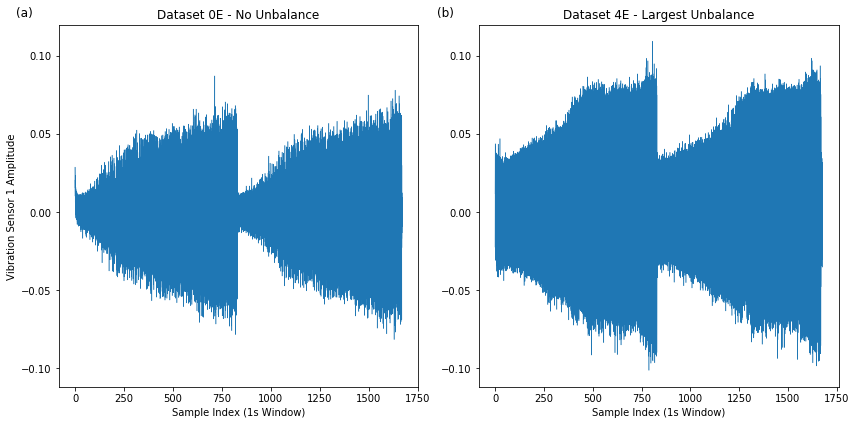

In [ ]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2, title="Dataset 0E - No Unbalance")
ax1.plot(np.arange(len(data0E['Vibration_1']))/4096, data0E['Vibration_1'], lw=0.5)
ax1.set_xlabel("Sample Index (1s Window)")
ax1.set_ylabel("Vibration Sensor 1 Amplitude")
ax1.text(-300, 0.125,"(a)", fontsize=12)
ax2 = plt.subplot2grid((2, 4), (0, 2), colspan=2, rowspan=2, title="Dataset 4E - Largest Unbalance", sharey=ax1)
ax2.plot(np.arange(len(data4E['Vibration_1']))/4096, data4E['Vibration_1'], lw=0.5)
ax2.set_xlabel("Sample Index (1s Window)")
ax2.text(-300, 0.125,"(b)", fontsize=12)
plt.tight_layout()
fig.savefig("../figures/Fig.4_ab.png", dpi=200)
plt.show()

In [ ]:
window = 4096  #FFT transformation of signal

n = int(np.floor(len(data0E['Vibration_1'])/window))
X_0E = data0E['Vibration_1'][:int(n)*window].values.reshape((n, window))
n = int(np.floor(len(data4E['Vibration_1'])/window))
X_4E = data4E['Vibration_1'][:int(n)*window].values.reshape((n, window))

X_0E_fft = np.abs(np.fft.rfft(X_0E, axis=1))[:,:int(window/2)]
X_4E_fft = np.abs(np.fft.rfft(X_4E, axis=1))[:,:int(window/2)]
X_0E_fft[:,0]=0
X_4E_fft[:,0]=0  

In this method, the first vibration sensor stream (also known as "Vibration 1")'s 4096 data or windows of one second were used to calculate the FFT. The Shannon-Nyquist sampling theorem states that this yields a physical sample size of 2048.

Each window's meaningful Fourier coefficients, which can be utilised for categorization. Once more, a development dataset that had undergone this transformation was randomly split into 90% training data and 10% test data. The FFT data were then scaled as follows: Based on the size of the training dataset (2048 values for the median and the interquantile spacing, respectively), the median and interquantile spacing of quantiles 5 and 95 were determined for each Fourier coefficient. Next, the FFT values were subtracted from the median values, and the resulting value was divided by interquartile values. Fully
connected (FC) neural networks were then trained on the
training data. The input consisting of 2048 Fourier
coefficients in each sample was followed by N hidden hidden
and fully connected layers with LeakyReLU activation and
the output layer. N was varied from 0 to 4. 

In [ ]:
labels = {'no_unbalance':0, 'unbalance':1}
sensor = 'Vibration_1'
samples_per_second = 4096
seconds_per_analysis = 1.0
window = int(samples_per_second*seconds_per_analysis)

def getfeat(data, label):
    n = int(np.floor(len(data)/window))
    data = data[:int(n)*window]
    X = data.values.reshape((n, window))
    y = np.ones(n)*labels[label]
    return X,y

X0,y0 = getfeat(data0D[sensor], "no_unbalance")
X1,y1 = getfeat(data1D[sensor], "unbalance")
X2,y2 = getfeat(data2D[sensor], "unbalance")
X3,y3 = getfeat(data3D[sensor], "unbalance")
X4,y4 = getfeat(data4D[sensor], "unbalance")
X=np.concatenate([X0, X1, X2, X3, X4])
y=np.concatenate([y0, y1, y2, y3, y4])

X0_val, y0_val = getfeat(data0E[sensor], "no_unbalance")
X1_val, y1_val = getfeat(data1E[sensor], "unbalance")
X2_val, y2_val = getfeat(data2E[sensor], "unbalance")
X3_val, y3_val = getfeat(data3E[sensor], "unbalance")
X4_val, y4_val = getfeat(data4E[sensor], "unbalance")
X_val=np.concatenate([X0_val, X1_val, X2_val, X3_val, X4_val])
y_val=np.concatenate([y0_val, y1_val, y2_val, y3_val, y4_val])

FCN

In [ ]:
print(X.shape, y.shape, X_val.shape, y_val.shape)

(32226, 4096) (32226,) (8420, 4096) (8420,)


In [ ]:
from sklearn.model_selection import train_test_split
train_test_ratio = 0.9
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1-train_test_ratio, random_state = 0)  

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(29003, 4096) (29003,) (3223, 4096) (3223,)


In [ ]:
X_fft = np.abs(np.fft.rfft(X, axis=1))[:,:int(window/2)]
X_train_fft = np.abs(np.fft.rfft(X_train, axis=1))[:,:int(window/2)]
X_test_fft = np.abs(np.fft.rfft(X_test, axis=1))[:,:int(window/2)]
X_val_fft = np.abs(np.fft.rfft(X_val, axis=1))[:,:int(window/2)]

X_fft[:,0]=0
X_train_fft[:,0]=0
X_test_fft[:,0]=0
X_val_fft[:,0]=0  

In [ ]:
scaler = RobustScaler(quantile_range=(5,95)).fit(X_train_fft)

X_fft_sc = scaler.transform(X_fft)
X_train_fft_sc = scaler.transform(X_train_fft)
X_test_fft_sc = scaler.transform(X_test_fft)
X_val_fft_sc = scaler.transform(X_val_fft)  #scaling

In [ ]:
X_val_fft_1 = X_val_fft_sc[:len(y0_val),:]
y_val_1 = y_val[:len(y0_val)]
X_val_fft_2 = X_val_fft_sc[len(y0_val):len(y0_val)+len(y1_val),:]
y_val_2 = y_val[len(y0_val):len(y0_val)+len(y1_val)]
X_val_fft_3 = X_val_fft_sc[len(y0_val)+len(y1_val):len(y0_val)+
                           len(y1_val)+len(y2_val),:]
y_val_3 = y_val[len(y0_val)+len(y1_val):len(y0_val)+len(y1_val)+
                len(y2_val)]
X_val_fft_4 = X_val_fft_sc[len(y0_val)+len(y1_val)+len(y2_val):len(y0_val)+
                           len(y1_val)+len(y2_val)+len(y3_val),:]
y_val_4 = y_val[len(y0_val)+len(y1_val)+len(y2_val):len(y0_val)+len(y1_val)+
                len(y2_val)+len(y3_val)]
X_val_fft_5 = X_val_fft_sc[len(y0_val)+len(y1_val)+len(y2_val)+len(y3_val):len(y0_val)+
                           len(y1_val)+len(y2_val)+len(y3_val)+len(y4_val),:]
y_val_5 = y_val[len(y0_val)+len(y1_val)+len(y2_val)+len(y3_val):len(y0_val)+len(y1_val)+
                len(y2_val)+len(y3_val)+len(y4_val)]

In [ ]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import BatchNormalization,LeakyReLU,Dense,Dropout
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Flatten,ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2

if not use_reference_models:
    
    weight_for_0 = len(y)/(2*len(y[y==0]))
    weight_for_1 = len(y)/(2*len(y[y==1]))
    class_weight = {0: weight_for_0, 1: weight_for_1}

    epochs = 100

    for i in range(5):
        X_in = Input(shape=(X_train_fft.shape[1],), name="cam_layer")
        x = X_in
        for j in range(i):
            x = Dense(units = 1024, activation="linear")(x)
            x = LeakyReLU(alpha=0.05)(x)
        X_out = Dense(units = 1, activation = 'sigmoid')(x)
        model_i = Model(X_in, X_out)


        best_model_filepath = f"{model_path}/fft_fcn_{i}_layers.h5"
        checkpoint = ModelCheckpoint(best_model_filepath, monitor='val_loss', 
                                     verbose=1, save_best_only=True, mode='min')

        model_i.compile(optimizer = Adam(lr=0.0005), loss = 'binary_crossentropy', 
                        metrics = ['accuracy'])
        model_i.summary()

        model_i.fit(X_train_fft_sc, y_train, epochs = 100, batch_size = 128,
                       validation_data=(X_test_fft_sc, y_test), callbacks=[checkpoint], 
                    class_weight=class_weight)

In [ ]:
from tensorflow.keras.models import load_model

model_loss = []
model_acc = []
model_accs_per_class = []

for i in range(5):
    best_model_filepath = f"{model_path}/fft_fcn_{i}_layers.h5"
    model_i = load_model(best_model_filepath)
    train_acc_ges = model_i.evaluate(X_train_fft_sc, y_train)
    val_acc_ges = model_i.evaluate(X_val_fft_sc, y_val)
    
    val_acc_1 = model_i.evaluate(X_val_fft_1, y_val_1)
    val_acc_2 = model_i.evaluate(X_val_fft_2, y_val_2)
    val_acc_3 = model_i.evaluate(X_val_fft_3, y_val_3)
    val_acc_4 = model_i.evaluate(X_val_fft_4, y_val_4)
    val_acc_5 = model_i.evaluate(X_val_fft_5, y_val_5)
    
    model_acc.append([train_acc_ges[1], val_acc_ges[1]])
    model_loss.append([train_acc_ges[0], val_acc_ges[0]])
    model_accs_per_class.append([val_acc_1, val_acc_2, val_acc_3, val_acc_4, val_acc_5])

53/53 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000


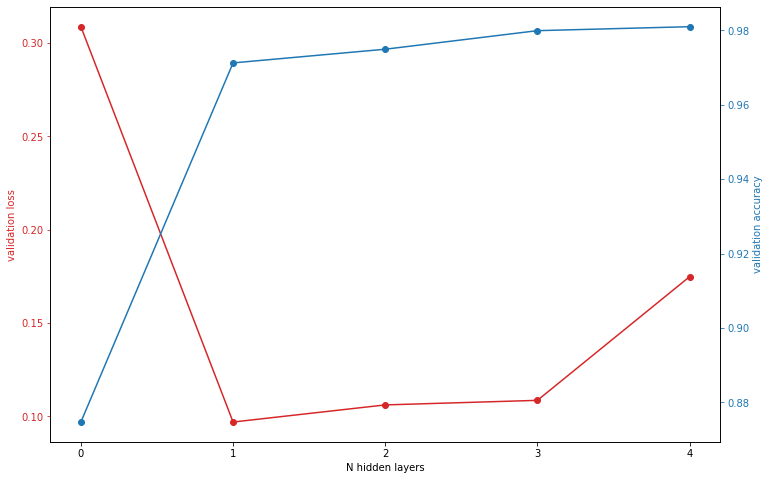

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot(111)
ax1.plot(np.array(model_loss)[:,1], color="tab:red", marker="o")
ax1.tick_params('y', colors='tab:red')
ax1.set_ylabel(ylabel = "validation loss", color="tab:red")
ax1.set_xticks([0,1,2,3,4])
ax1.set_xlabel("N hidden layers")
ax2 = ax1.twinx()
ax2.plot(np.array(model_acc)[:,1], color="tab:blue", marker="o")
ax2.tick_params('y', colors='tab:blue')
ax2.set_ylabel(ylabel = "validation accuracy", color="tab:blue")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model0 = load_model(f"{model_path}/fft_fcn_0_layers.h5")
model1 = load_model(f"{model_path}/fft_fcn_1_layers.h5")
model2 = load_model(f"{model_path}/fft_fcn_2_layers.h5")
model3 = load_model(f"{model_path}/fft_fcn_3_layers.h5")
model4 = load_model(f"{model_path}/fft_fcn_4_layers.h5")  

In [ ]:
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cam_layer (InputLayer)       [(None, 2048)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 3,148,801
Trainable params: 3,148,801
Non-trainable params: 0
_________________________________________________

In [ ]:
accuracies_per_class = []
for i in range(5):
    filepath_i = f"{model_path}/fft_fcn_{i}_layers.h5"
    model_i = load_model(filepath_i)
    
    val_acc_1 = model_i.evaluate(X_val_fft_1, y_val_1)
    val_acc_2 = model_i.evaluate(X_val_fft_2, y_val_2)
    val_acc_3 = model_i.evaluate(X_val_fft_3, y_val_3)
    val_acc_4 = model_i.evaluate(X_val_fft_4, y_val_4)
    val_acc_5 = model_i.evaluate(X_val_fft_5, y_val_5)
    accuracies_per_class.append([val_acc_1, val_acc_2, val_acc_3, val_acc_4, val_acc_5])

53/53 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000


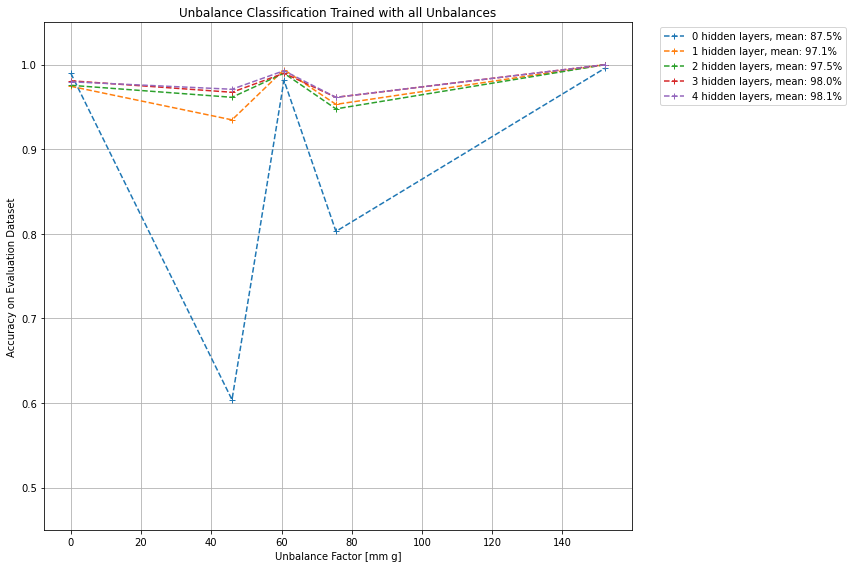

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot(111, title = "Unbalance Classification Trained with all Unbalances")
unbalances = np.array([0, 4.59e-5, 6.07e-5,7.55e-5,1.521e-4])
ax1.plot(1e6*unbalances, np.array(accuracies_per_class)[0,:,1], label=f"0 hidden layers, mean: {100.0*np.mean(np.array(accuracies_per_class)[0,:,1]):.1f}%", marker="+", ls="--")
ax1.plot(1e6*unbalances, np.array(accuracies_per_class)[1,:,1], label=f"1 hidden layer, mean: {100.0*np.mean(np.array(accuracies_per_class)[1,:,1]):.1f}%", marker="+", ls="--")
ax1.plot(1e6*unbalances, np.array(accuracies_per_class)[2,:,1], label=f"2 hidden layers, mean: {100.0*np.mean(np.array(accuracies_per_class)[2,:,1]):.1f}%", marker="+", ls="--")
ax1.plot(1e6*unbalances, np.array(accuracies_per_class)[3,:,1], label=f"3 hidden layers, mean: {100.0*np.mean(np.array(accuracies_per_class)[3,:,1]):.1f}%", marker="+", ls="--")
ax1.plot(1e6*unbalances, np.array(accuracies_per_class)[4,:,1], label=f"4 hidden layers, mean: {100.0*np.mean(np.array(accuracies_per_class)[4,:,1]):.1f}%", marker="+", ls="--")
plt.ylabel("Accuracy on Evaluation Dataset")
plt.xlabel("Unbalance Factor [mm g]")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim([0.45, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusion 

The best results were derived by using FFT scaled data when using 4 hidden layers on unbalance classification using all unbalances.There can be pairing of datasets to differentiat between two unbalanced classes and that will yield different results.  